# Predicting Heart Disease Using Machine Learning #
<i> Author: Roshan Lodha </i>
### Section 0: Introduction ###
   
Over the past few decades, the use of data and data itself have exploded in a phenomenon coined "the big-data revoluton." While big-data has trickled into most industries, from finance to fast-food, healthcare has been notoriously slow to adopt it. Paradoxically, the healthcare industry has one of the "cleanest" and most complete datasets in modern history, yet for a plethora of reasons has not been able to capitolize on this. 
    
Through this notebook, I aim to demonstrate just how important data is to modern medicine, and how it is the responsibility of the next few generations to better incroporate advvanced data-science techniques to help bridge healthcare disparity. 

In [1]:
#ignore irrelavant warnings
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Section 1: The Data ###
<i> source: <a href="https://www.kaggle.com/johnsmith88/heart-disease-dataset">David Lapp via Kaggle</a></i>

<b>The dataset:</b> Our dataset is a relatively small one at just over 1000 entries, and contains various measurements for both healthy patients and those with heart complications including markers for age, sex, chest-pain, blood-pressure, resting blood pressure, etc. <br>
<b>Our goal:</b> Using the limited data, we hope to both predict whether or not a certain patient will have heart disease and simultaneously determine which features (measurements) are most indicative of heart complications.

<font color='red'><i>Note: This model should NOT be used as a predictive tool in any capacity for limitations discussed in the conclusion.</i></font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

heart = pd.read_csv("heart.csv")
heart['bias'] = 1 #add intercept term
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bias
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1


### Section 2: Data Engineering and Feature Selection ###
Taking a look at our data above, we notice a few key details. First, the data is entirely numerical with binary values encoded as 1 or 0; this is important for downstream application. Additionally, we note that there are 14 seemingly orthogonal dimensions (13 + 1 intercept). <br>
In the following section, we will determine which features are important, and measure the true dimensionality of the data both visually and analytically. 

In [3]:
#test-train split
import sklearn.model_selection
train, test = sklearn.model_selection.train_test_split(heart, train_size=0.8, test_size=0.2)
print('Train Shape:', train.shape, '\nTest Shape:', test.shape)

Train Shape: (820, 15) 
Test Shape: (205, 15)


Firstly, we can measure the visualize the covariance between each variable pair using a pairplot. Notably, the second row from the bottom of the pairplot shows how every other variable correlates with heart disease.

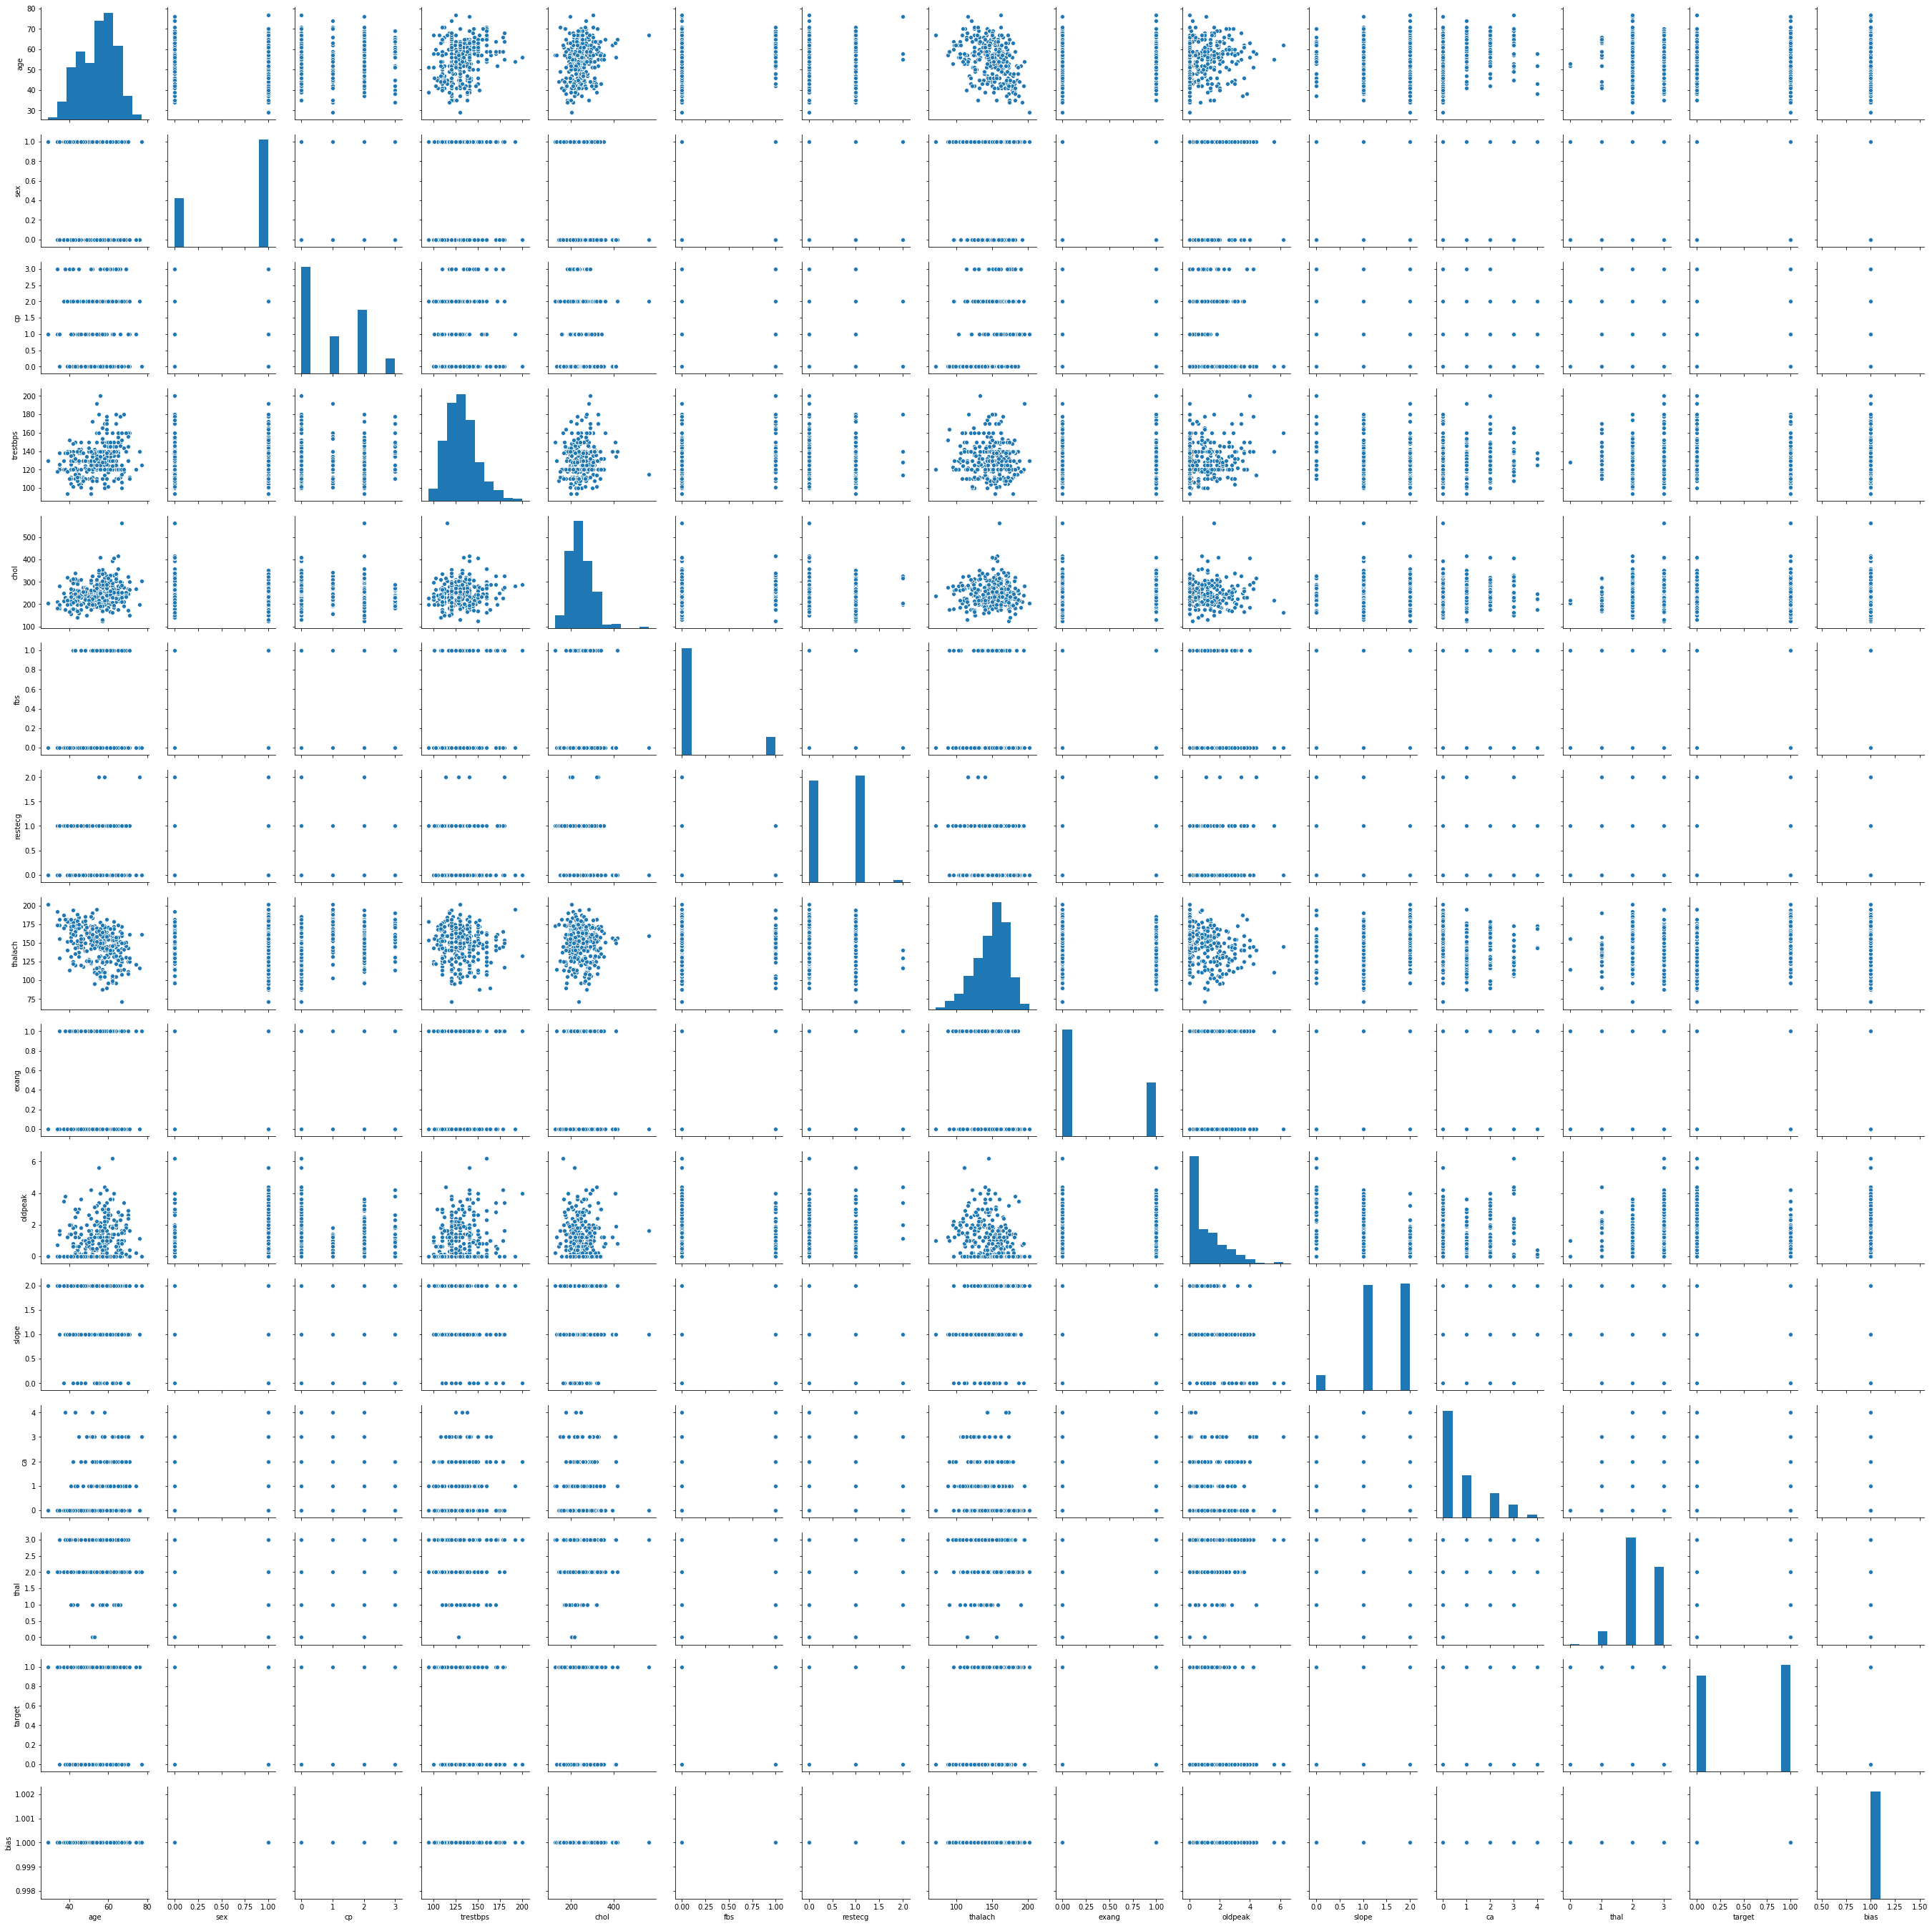

In [4]:
sns.pairplot(train)

In general, we notice very weak correlations between variables, indicating that no single variable is a great predictor. We can take a closer look at a single plot in the pairplot to better explore this.

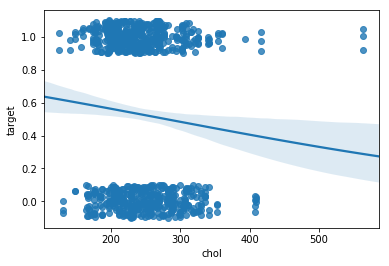

In [5]:
#cholesterol vs heart disease
sns.regplot(x='chol', y='target', data=train, logistic=True, y_jitter=0.1)

The logistic regression line approximated the probability that a patient has heart disease given solely his serum cholesterol level. Obviously the trendline makes no sense, and provides a seemingly opposite relationship than expected.

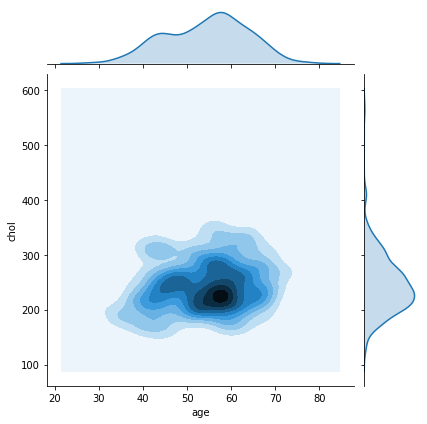

In [6]:
sns.jointplot(x='age', y='chol', data=train, kind='kde')

We can also use a jointplot to show how two non-binary variables covary. Plotted above are cholesteroal and age; we note an extremely tiny positive correlation.

As aforementioned, the weak correlation between nearly all the variables, something which can be proven mathematically using singular value decomposition.

/Users/roshanlodha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/roshanlodha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


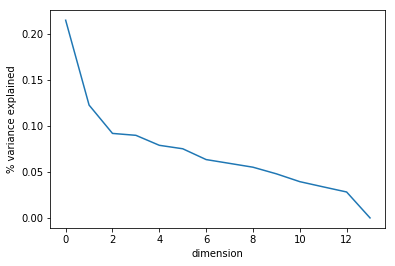

In [7]:
#standardize the data for PCA
from sklearn.preprocessing import StandardScaler

X_pca = np.matrix(StandardScaler().fit_transform(train.drop(['target'], axis=1)))
u, s, vt = np.linalg.svd(X_pca)

var = s**2/np.sum(s**2)
plt.xlabel('dimension')
plt.ylabel('% variance explained')
plt.plot(var)

### Section 3: Model Selection and Training ###
With all of our exploratory data analysis and data engineering complete, we can train a logistic model and assess its accuracy. 

In [8]:
import sklearn.linear_model
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True)

X_train = train.drop(['target'], axis=1)
y_train = train['target']
X_test = test.drop(['target'], axis=1)
y_test = test['target']

lr.fit(X_train, y_train)
train_accuracy = np.sum(lr.predict(X_train) == y_train)/len(X_train)
test_accuracy = np.sum(lr.predict(X_test) == y_test)/len(X_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8646
Test accuracy: 0.8390


### Section 4: Conclusion and Future Avenues###
As week can see, even with such limited data we can achieve a predictive accuracy of nearly 84% on data never seen before. With millions of lines of data, and more dimensions of measurements, the accuracy could easily break 90%. Moreover, our model was built without the use of neural nets for feature selection, dropout to prevent overfitting, LASSO and RIDGE penalties, and a bunch of other modern techniques which could only improve the quality of the model.

The implications of such a simple project, done by someone with limited knowledge in data manipulation techniques are tremendous. Expanding this model to include the aforementioned techniques and training on a larger dataset coupled with robust testing could see similar diagnostic tools be proficient for a hospital setting within the next few years.

With the big-data boom, and data here to stay, it is up to the next few generations of physicians and physician-scientists to help the healthcare industry catch up.